In [ ]:
!pip install tensorflow
import numpy as np
import os
from skimage import data
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
from scipy import misc
from PIL import Image
import scipy.misc
import imageio
from skimage.transform import rescale, resize
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
import random
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from skimage import io
from sklearn.model_selection import train_test_split

In [ ]:
X=[]
Y=[]
base_path='D:\DNN_DL\Covid_data'
source_path=base_path
for child in os.listdir(source_path):
    print(child)
    sub_path = os.path.join(source_path, child)
    if os.path.isdir(sub_path):
        for data_file in os.listdir(sub_path):
            Qry = Image.open(os.path.join(sub_path, data_file))
            Qry = Qry.convert("RGB")
            Qry = np.array(Qry.resize((224,224)))
            #Qry = Qry.reshape([224,224,3])
            Qry = Qry[:,:,2]
            flist=np.array(Qry)
            X.append(flist)
            Y.append(child)

Covid
NORMAL
PNEUMONIA


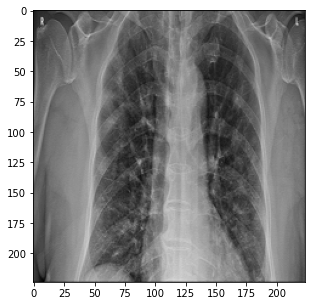

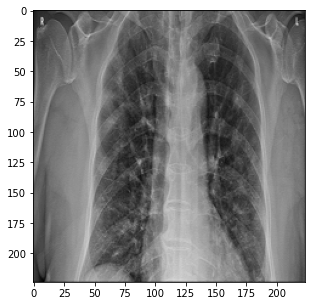

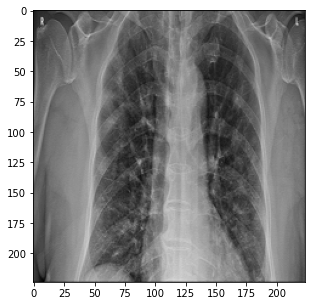

In [ ]:
for i in range(3):
    plt.figure(figsize = [5,5])
    curr_img = np.reshape(X[2],(224,224))
    plt.imshow(curr_img, cmap="gray")
    plt.show()

In [ ]:
images_arr = np.asarray(X)
images_arr = images_arr.astype('float32')
images_arr = images_arr / np.max(images_arr)

In [ ]:
X=[]
for i in range(images_arr.shape[0]):
    img= resize(images_arr[i] ,(224,224),anti_aliasing=True)
    flist=np.array(img.flatten())
    X.append(flist)


In [ ]:
X=np.asarray(X)
X.shape
X=X.astype('float32')

In [ ]:
from sklearn.preprocessing import LabelBinarizer
labelBinarizer = LabelBinarizer()
y=labelBinarizer.fit_transform(Y)
print(y)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]


In [ ]:
y.shape

(891, 3)

In [ ]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
len(X_train)
len(y_train)

712

In [ ]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
dnnModel=Sequential()
dnnModel.add(Dense(256,activation="relu",input_shape=(224*224,)))
dnnModel.add(Dense(256,activation="relu"))
dnnModel.add(Dense(128,activation="relu"))
dnnModel.add(Dense(128,activation="relu"))
dnnModel.add(Dense(128,activation="relu"))
dnnModel.add(Dense(128,activation="relu"))
dnnModel.add(Dense(128,activation="relu"))
dnnModel.add(Dense(64,activation="relu"))
dnnModel.add(Dropout(0.5))
dnnModel.add(Dense(3,activation="softmax"))
dnnModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               12845312  
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 128)               1

In [ ]:
sgd = SGD(lr=0.02)
dnnModel.compile(optimizer='sgd',loss="categorical_crossentropy",metrics=["accuracy"])
history_seq =  dnnModel.fit(X_train,y_train,epochs=150,batch_size=64,verbose=1,validation_split=0.1)

Epoch 1/150


C:\Users\tech\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


10/10 [==============================] - 1s 59ms/step - loss: 1.0616 - accuracy: 0.4187 - val_loss: 1.1048 - val_accuracy: 0.3889
Epoch 2/150
10/10 [==============================] - 0s 41ms/step - loss: 1.0184 - accuracy: 0.4953 - val_loss: 1.0048 - val_accuracy: 0.4444
Epoch 3/150
10/10 [==============================] - 0s 44ms/step - loss: 0.9404 - accuracy: 0.5828 - val_loss: 0.8417 - val_accuracy: 0.7500
Epoch 4/150
10/10 [==============================] - 0s 40ms/step - loss: 0.9307 - accuracy: 0.5734 - val_loss: 0.7814 - val_accuracy: 0.7222
Epoch 5/150
10/10 [==============================] - 0s 43ms/step - loss: 0.8338 - accuracy: 0.6578 - val_loss: 0.6815 - val_accuracy: 0.7361
Epoch 6/150
10/10 [==============================] - 0s 42ms/step - loss: 0.7805 - accuracy: 0.6812 - val_loss: 0.6391 - val_accuracy: 0.7361
Epoch 7/150
10/10 [==============================] - 0s 42ms/step - loss: 0.7866 - accuracy: 0.6687 - val_loss: 0.5458 - val_accuracy: 0.8056
Epoch 8/150
10/10 

In [ ]:
testLoss, testAccuracy =dnnModel.evaluate(X_test,y_test)
print("Test Loss =", testLoss*100)
print("Test Accuracy =", testAccuracy*100)

6/6 [==============================] - 0s 8ms/step - loss: 0.2309 - accuracy: 0.9162
Test Loss = 23.09385985136032
Test Accuracy = 91.6201114654541


In [ ]:
import pandas as pd

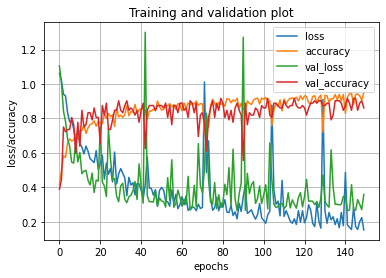

In [ ]:
pd.DataFrame(history_seq.history).plot()
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss/accuracy")
plt.title("Training and validation plot")
plt.show()

In [ ]:
#Some studies show that up to 40% of people with COVID-19 are “asymptomatic.” That means they don’t feel sick or have symptoms. But the virus can still affect your body. X-rays and CT scans of some people without symptoms show lung damage including “ground-glass opacities,” a typical lung lesion in people with COVID-19.
 

